In [128]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [129]:
data = np.load("../datos/fit_exercise.npy")

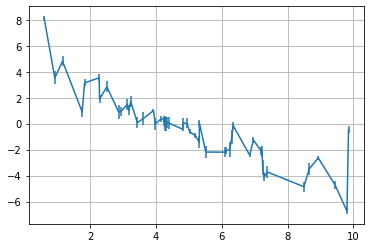

In [130]:
plt.errorbar(data[0], data[1], yerr= data[2])
plt.grid()

In [138]:
def chi_square(m, b):
    total = 0
    for i in range(np.size(data[0])):
        total += (data[1][i]-(m*data[0][i]+b))**2/data[2][i]**2
    return total

In [139]:
print(chi_square(-1, 6))

2154.651498070416


In [161]:
#MALLA BONITA
m_min = -2
m_max = 0
b_min = 2
b_max = 8
N = 10

m_inter = np.linspace(m_min, m_max, N)
b_inter = np.linspace(b_min, b_max, N)
chi = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        chi[i][j] = chi_square(m_inter[i], b_inter[j])
        
print("Chi minima = ",np.amin(chi))
pos = np.where(chi == np.amin(chi))
print("m = ", m_inter[pos[0][0]], "b = ", b_inter[pos[1][0]])

Chi minima =  1246.4692834694686
m =  -1.1111111111111112 b =  5.333333333333333


In [162]:
#Datos aleatorios

N = 10
chi = np.zeros((N, N))
np.random.seed(5)
m_inter = np.random.rand(N)
b_inter = np.random.rand(N)

m_inter = m_inter*(m_max-m_min)+m_min
b_inter = b_inter*(b_max-b_min)+b_min

for i in range(N):
    for j in range(N):
        chi[i][j] = chi_square(m_inter[i], b_inter[j])
        
print("Chi minima = ",np.amin(chi))
pos = np.where(chi == np.amin(chi))
print("m = ", m_inter[pos[0][0]], "b = ", b_inter[pos[1][0]])

Chi minima =  1310.2063193586876
m =  -0.9631640242541135 b =  4.647855337375718


In [163]:
optimize.minimize(chi_square, -1, 5.333333333333333)

      fun: 1232.5007834139456
 hess_inv: array([[8.54238024e-05]])
      jac: array([3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 22
      nit: 2
     njev: 7
   status: 2
  success: False
        x: array([-1.08656996])

In [168]:
def binaria_m(b):
    m_min = -2
    m_max = 0
    b_min = 2
    b_max = 8
    m_mid = (m_max-m_min)/2
    pos_max = chi_square(m_max, b)
    pos_min = chi_square(m_min, b)
    pos_mid = chi_square(m_mid, b)
    
    count = 0
    while(min(abs(m_mid-m_max), abs(m_mid-m_min))>0.00000000000001 and count<10000):
        count+=1
        if(pos_mid-pos_max<pos_mid-pos_min):
            m_min = m_mid
            pos_min = pos_mid
            m_mid = (m_max-m_min)/2
            pos_mid = chi_square(m_mid, b)
        else:
            m_max = m_mid
            pos_max = pos_mid
            m_mid = (m_max-m_min)/2
            pos_mid = chi_square(m_mid, b)
    
    return m_mid

In [169]:
binaria_m(5.333333333333333)

-0.9999999999999929